In [2]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage

In [163]:
epsilon = 10.0
k = 3
K = 2 * k + 1

sigma = 1 #for gaussian kernel

original = io.imread("images/originals/EPFL.jpg")

In [164]:
I = np.zeros( (K, K, 1) )
I[k, k] = 1

W = np.zeros(I.shape) #kernel full of 0's 
#W = np.ones(I.shape) #kernel full of 1's 
for i in range(-k, k + 1):
    for j in range(-k, k + 1):
        W[i + k, j + k] = np.exp(-(i*i + j*j) / (2 * sigma * sigma)) / (2 * np.pi * sigma * sigma) #gaussian kernel

In [165]:
print(np.sum(np.abs(W-I)))
def isSmallEngough():
    return np.sum(np.abs(W-I)) < epsilon

1.6811489056425462


In [166]:
blurred = ndimage.convolve(original, W, mode='nearest')

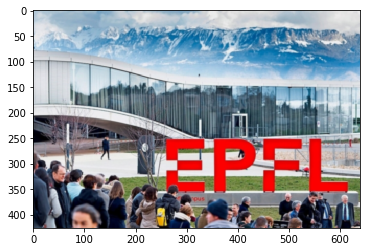

In [167]:
plt.imshow(blurred)

In [168]:
blurred_ = np.zeros(original.shape)
X = original.shape[0]
Y = original.shape[1]
for x in range(0, X):
    for y in range(0, Y):
        for i in range(-k, k + 1):
            for j in range(-k, k + 1):
                if (x + i < 0):
                    _x = 0
                elif (x + i >= X):
                    _x = X-1
                else:
                    _x = x + i
                if (y + j < 0):
                    _y = 0
                elif (y + j >= Y):
                    _y = Y-1
                else:
                    _y = y + j
                blurred_[x, y] += original[_x, _y]
        blurred_[x, y] /= 255 * K * K

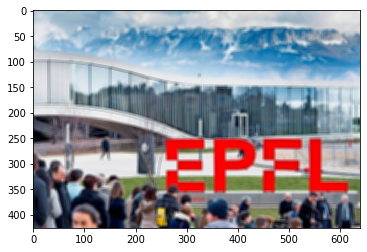

In [169]:
plt.imshow(blurred_)

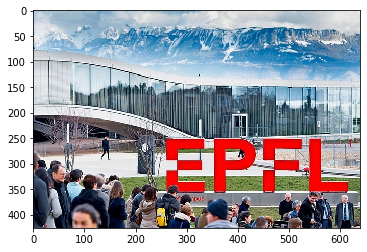

In [99]:
plt.imshow(original)